In [2]:
library(tidyr)
library(dplyr)
utr=read.csv("utr.counts2.csv")
exp=read.csv("exp_df.csv")

In [6]:
head(utr)


gene,TSS,end,start,UTR_length,utr_counts,sample
C0343,2818676,2818728,2818676,52,4,utRho01
aaeB,6776526,6776526,6776376,150,20,utRho01
aaeR,6778762,6779040,6778762,278,136,utRho01
aaeX,6778860,6778860,6778674,186,170,utRho01
aat,1854920,1854920,1854864,56,32,utRho01
accA,416822,417242,416822,420,2390,utRho01


In [7]:
head(exp)

bc_id,bc_seq,bcm,sample,temp
BC01,ACATTA,False,utRho01,10
BC13,GAACCT,False,utRho02,10
BC25,ACAACG,False,utRho03,10
BC37,AGTTGA,True,utRho04,10
BC49,AGGCAT,True,utRho05,10
BC61,GAAGTG,True,utRho06,10


In [8]:
#merge datframes, reorder and remove columns
merge_df=merge(utr,exp,by="sample")
UTR_counts=merge_df[,c('gene','TSS','start','end','UTR_length','utr_counts','sample','bcm','temp')]
head(UTR_counts)

gene,TSS,start,end,UTR_length,utr_counts,sample,bcm,temp
C0343,2818676,2818676,2818728,52,4,utRho01,False,10
aaeB,6776526,6776376,6776526,150,20,utRho01,False,10
aaeR,6778762,6778762,6779040,278,136,utRho01,False,10
aaeX,6778860,6778674,6778860,186,170,utRho01,False,10
aat,1854920,1854864,1854920,56,32,utRho01,False,10
accA,416822,416822,417242,420,2390,utRho01,False,10


In [9]:
#define function in R
pseudocounts= function(x) if (x==0) return(x+1) else (x)

In [10]:
#add pseudocounts for log transformation to both UTR counts and lengths
fixed_UTR_counts=lapply(UTR_counts[,c("utr_counts")],pseudocounts)
fixed_UTR_counts=unlist(fixed_UTR_counts)
UTR_counts$utr_counts=fixed_UTR_counts

fixed_UTR_lengths=lapply(UTR_counts[,c("UTR_length")],pseudocounts)
fixed_UTR_lengths=unlist(fixed_UTR_lengths)
UTR_counts$UTR_length=fixed_UTR_lengths

In [12]:
#normalizig UTR counts by length 
utr_norm=UTR_counts$utr_counts/UTR_counts$UTR_length
UTR_counts['utr_norm']=utr_norm
head(UTR_counts)

gene,TSS,start,end,UTR_length,utr_counts,sample,bcm,temp,utr_norm
C0343,2818676,2818676,2818728,52,4,utRho01,False,10,0.07692308
aaeB,6776526,6776376,6776526,150,20,utRho01,False,10,0.13333333
aaeR,6778762,6778762,6779040,278,136,utRho01,False,10,0.48920863
aaeX,6778860,6778674,6778860,186,170,utRho01,False,10,0.91397849
aat,1854920,1854864,1854920,56,32,utRho01,False,10,0.57142857
accA,416822,416822,417242,420,2390,utRho01,False,10,5.69047619


In [42]:
#only keep columns we care about
UTR_counts_subset= select(UTR_counts,gene,sample,bcm,utr_norm)

#filter to only bcm False
bcm_false= UTR_counts_subset %>% filter(bcm=='False')

#turn long formatted data into wide format
bcm_false_sub= bcm_false %>% spread(sample,utr_norm)
bcm_false_sub= bcm_false_sub[,3:17]
head(bcm_false_sub)

utRho01,utRho02,utRho03,utRho07,utRho08,utRho09,utRho13,utRho14,utRho15,utRho19,utRho20,utRho21,utRho25,utRho26,utRho27
0.1333333,0.006666667,0.006666667,0.006666667,0.006666667,0.006666667,0.006666667,0.006666667,0.006666667,0.01333333,0.006666667,0.006666667,0.34666667,0.006666667,0.006666667
0.4892086,0.453237410,0.589928058,0.359712230,0.302158273,0.158273381,0.172661871,0.194244604,0.071942446,0.02158273,0.050359712,0.431654676,0.41726619,0.215827338,0.503597122
0.9139785,1.365591398,0.720430108,0.752688172,0.451612903,0.440860215,0.301075269,0.860215054,0.193548387,0.40860215,0.451612903,0.774193548,0.54838710,0.634408602,0.516129032
0.5714286,0.214285714,0.285714286,0.017857143,0.017857143,1.142857143,1.035714286,0.017857143,0.017857143,0.01785714,0.017857143,0.017857143,0.01785714,0.017857143,0.571428571
5.6904762,5.238095238,4.771428571,4.614285714,4.695238095,5.042857143,7.866666667,6.904761905,4.247619048,2.29523810,4.690476190,3.619047619,0.64761905,0.266666667,0.738095238
22.0878378,21.270270270,14.250000000,18.432432432,16.283783784,13.554054054,20.375000000,19.358108108,10.641891892,6.87162162,7.996621622,8.729729730,1.40540541,1.540540541,0.743243243


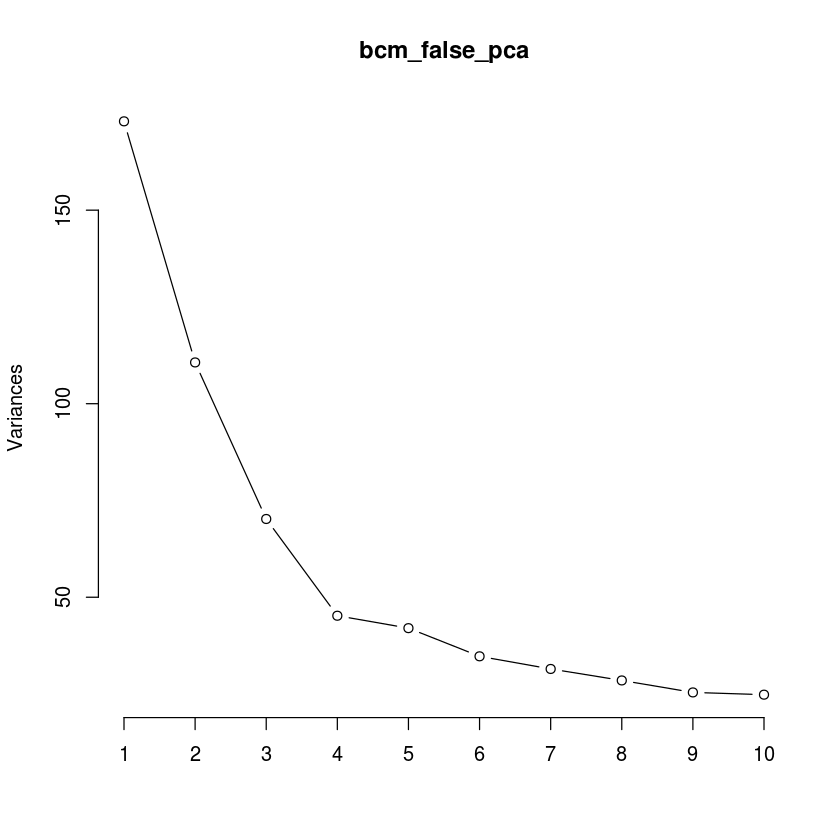

In [43]:
log_df=log(bcm_false_sub)
scale_log_df=scale(log_df,center=FALSE,scale=TRUE)

bcm_false_pca=prcomp(t(scale_log_df))
plot(bcm_false_pca,type='l')

In [46]:

false_samples=unique(bcm_false[['sample']])
#false_samples=unique(false_samples)
#false_samples=list(false_samples)
false_samples=data.frame(false_samples)
#head(false_samples)
colnames(false_samples)="sample"
false_sample_temps= inner_join(exp,false_samples)
false_sample_temps


#plot(bcm_false_pca$x)

Joining, by = "sample"


bc_id,bc_seq,bcm,sample,temp
BC01,ACATTA,False,utRho01,10
BC13,GAACCT,False,utRho02,10
BC25,ACAACG,False,utRho03,10
BC73,AACAAG,False,utRho07,25
BC85,TTGGTA,False,utRho08,25
BC02,GGTGAG,False,utRho09,25
BC50,ACCTAC,False,utRho13,37
BC62,AGAATC,False,utRho14,37
BC74,AACCGA,False,utRho15,37
BC27,CAAGCA,False,utRho19,44


In [93]:
pca_df=data.frame(bcm_false_pca$x)
temps=c(false_sample_temps$temp)
temps=factor(temps)
temps=as.character(temps)
pca_df['temps']=temps
temps
#pca_df

[1] "10" "10" "10" "25" "25" "25" "37" "37" "37" "44" "44" "44" "51" "51" "51"

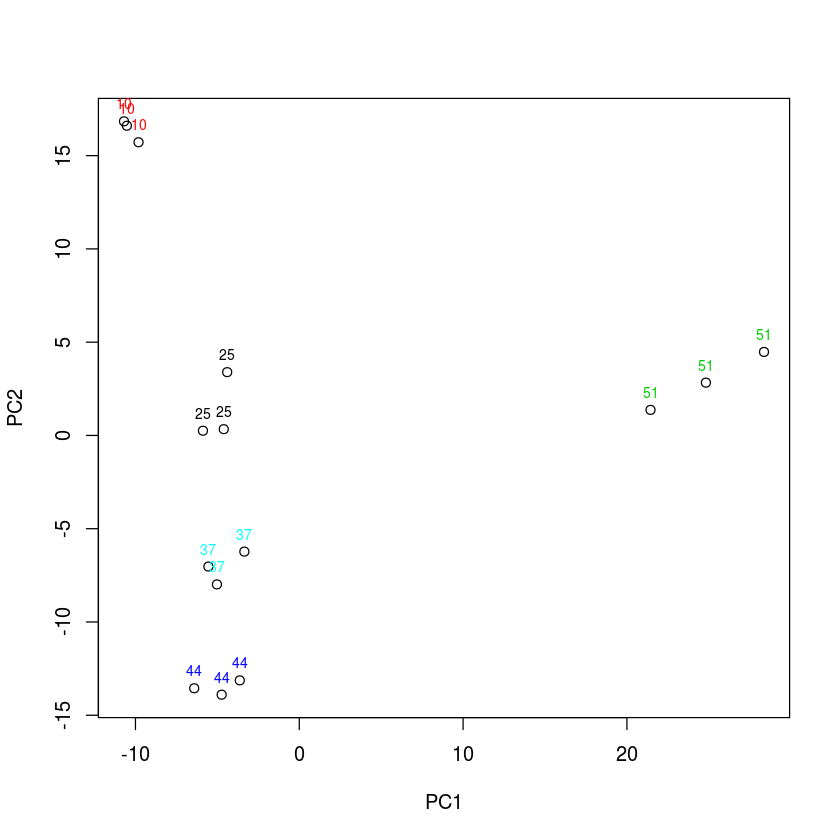

In [106]:
plot(pca_df[,1], pca_df[,2], 
     xlab="PC1",ylab="PC2")

text(pca_df[,1], pca_df[,2],label=temps,col=temps,
        cex=0.7, pos = 3)

In [79]:
factor(temps)

[1] 10 10 10 25 25 25 37 37 37 44 44 44 51 51 51
Levels: 10 25 37 44 51

In [102]:
pca_df


,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,temps
utRho01,-10.699092,16.8398888,-7.523154,0.47549334,-1.9387650,1.3744379,-0.3171433,0.8166548,-9.125853702,4.9149519,-8.9772797,-0.009799335,-2.36464736,3.53924597,1.842493e-14,10
utRho02,-10.523148,16.6045858,-4.937013,-1.00346257,1.1066666,5.7569113,2.8873978,-1.5274352,13.339511165,-4.7364394,-2.5522950,-0.150154497,-0.63230483,-0.49988860,9.608051e-15,10
utRho03,-9.811967,15.7197904,-4.554162,-0.90586599,-1.4902640,-0.8543924,-0.8638281,-0.3664967,-5.238780300,-0.8714068,12.7645241,-2.921908651,2.38739825,-3.66285566,-1.776856e-14,10
utRho07,-5.880608,0.2534411,9.115034,0.36671392,0.9004442,-8.0871063,-0.4340439,-1.1891594,1.206724933,3.6288468,-1.5155706,4.121495946,-8.24375339,-9.05056172,1.106493e-14,25
utRho08,-4.609047,0.3370254,11.155192,-0.01535643,0.2387676,-10.1441388,-2.4100993,-0.5112329,1.611339580,-1.0516759,-4.5540649,-9.583466532,7.02759219,0.65580014,1.016927e-14,25
utRho09,-4.399837,3.3933373,7.588954,-0.18333528,1.1080638,-5.3943292,-0.8523017,3.7343962,1.361527786,0.1557678,2.5714773,11.782844849,4.88442587,6.46226496,1.188763e-14,25
utRho13,-5.547652,-7.0296326,9.169441,3.41291114,2.8243772,7.4085757,1.1274787,-2.9528020,-7.136467319,-12.5021775,-2.3392157,1.809087676,0.02073404,-1.70263878,7.133671e-15,37
utRho14,-5.025240,-7.9853584,7.475873,4.17899361,2.5823272,12.4647529,0.4478574,1.1039070,1.260339972,10.8073124,0.5180656,-0.539475342,4.98585340,-2.68519513,-3.531463e-15,37
utRho15,-3.352908,-6.2286332,7.094856,0.90269274,2.1354872,1.3798626,0.9249516,1.7994924,1.342838080,0.9640862,5.1243612,-5.455178519,-9.64938003,8.46444300,9.907439e-15,37
utRho19,-3.631744,-13.1307293,-10.359848,-1.39439373,-2.7809457,-2.0572880,6.7631429,14.5295547,0.001156963,-2.3755542,-0.9945167,-0.970731387,0.54612657,-2.49791212,2.618999e-15,44


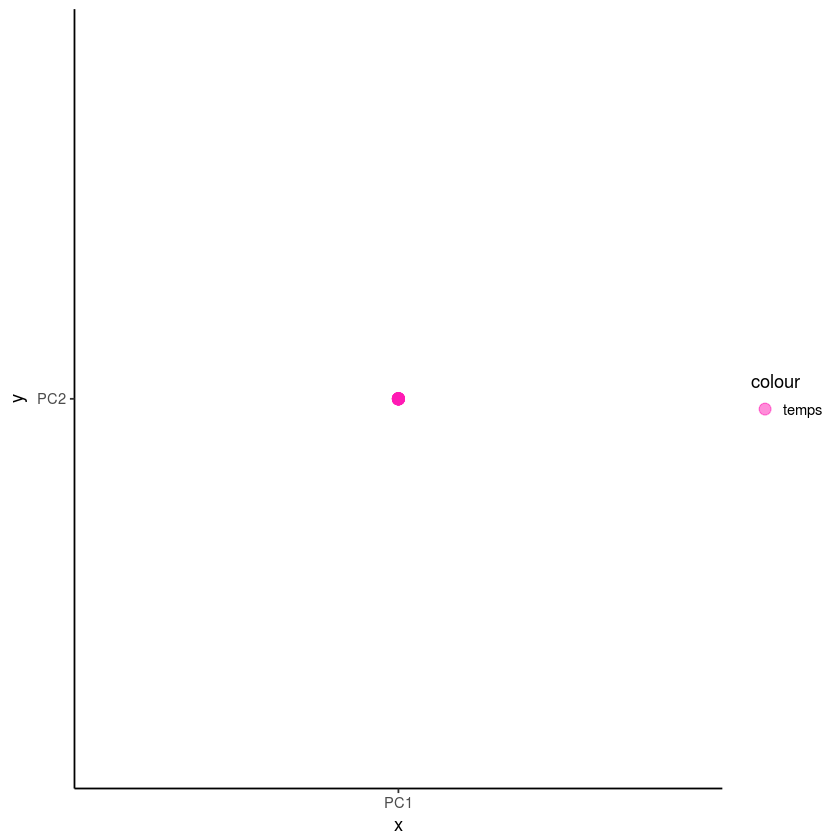

In [103]:
ggplot(pca_df,aes(x='PC1',y='PC2',col='temps'))+
   geom_point(size=3,alpha=0.5)+ #Size and alpha just for fun
   scale_color_manual(values = c("#FF1BB3","#A7FF5B","#99554D"))+ #your colors here
   theme_classic()